# COVID Data Plotting/Visualization Examples

This Notebook is mostly here to show the various plotting and visualization functions we have written into our libraries.  It could also be viewed as a way of testing the pieces we needed to develop for the Dashboard notebook.


In [1]:
# This forces a reload of any external library file if it changes.  
# Useful when developing external libraries since otherwise Jupyter 
# will not re-import any library without restarting the python kernel.

%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import ipywidgets as widgets

from cycler import cycler
import pandas as pd
import datetime
import time
from IPython.core.display import display, HTML
from COVIDlib.collectors import days_since

# Import COVID IO routines from external python libraries
import COVIDlib.data_IO as COVID_IO
import COVIDlib.dashboard_IO as COVID_Dash
import COVIDlib.dashboard_maps as COVID_Maps

# Store the original 10 color sequence of colors used by Matplotlib by default to avoid having
# Seaborn override it
original_cycle = mpl.rcParams['axes.prop_cycle']

# Set up nicer Seaborn style as default
mpl.style.use('seaborn')
mpl.rcParams['axes.prop_cycle']= original_cycle

## Define variables of interest below
data_dir = 'our_data/'    # Data directory for the COVID datafiles

## Define FIPS corresponding to various local areas
ClayFIPS = 27027
CassFIPS = 38017
MNFIPS = 27
NDFIPS = 38

In [3]:
# Load all the dataframes into memory
print("Loading COVID Dataset ... ", end='')

start= time.perf_counter()
# Retrieve John Hopkins dataframes and add "rates" of deaths/infections
(JH_state_df, JH_cnty_df) = COVID_IO.PtoCDRDataFrames()

# Construct dictionary of FIPS values by placename
FIPSd = COVID_Dash.build_fipsdict(JH_cnty_df, JH_state_df)

# Retrieve Apple Mobility Dataframe
(aapl_cnty_df, aapl_state_df) = COVID_IO.PtoAAPLMobilityDataFrames()

# Retrieve Google Mobility Dataframe
(goog_cnty_df, goog_state_df) = COVID_IO.PtoGOOGMobilityDataFrames()

# Retrieve IMHE Dataframes
(summary_df, hospitalization_df) = COVID_IO.PtoIMHEDataFrames()

# Retrieve Rt Live DataFrames
RtLive_df = COVID_IO.PtoRtDataFrames()

end= time.perf_counter()

print(f"Done ({end-start:0.2f} sec)")

Loading COVID Dataset ... Done (1.15 sec)


# Extracting numerical data from the dataframes

Just quickly showing how the `getLocalDataFrame()` can extract a entries for single states or counties from any of these dataframes based on the FIPS number, in this case from the Apple Mobility Dataframes for counties and states.

In [4]:
#Retriving Apple county Mobility Data
claycountyData=COVID_IO.getLocalDataFrame(ClayFIPS,aapl_cnty_df)
casscountyData=COVID_IO.getLocalDataFrame(CassFIPS,aapl_cnty_df)
#Retriving Apple State Mobility Data
MNStateData =COVID_IO.getLocalDataFrame(MNFIPS,aapl_state_df)
NDStateData =COVID_IO.getLocalDataFrame(NDFIPS,aapl_state_df)

In [5]:
print("-----------------------------------------------\n 5 Most Recent Days of Clay County Apple Driving Mobility\n-----------------------------------------------\n")
applDatesCounty=(claycountyData['dates']).iloc[0][-5:]
aaplDrivingMobility=(claycountyData['driving_mobility']).iloc[0][-5:]
for item,datesin in zip(aaplDrivingMobility, applDatesCounty):
    print(f"{datesin} Driving mobility is {item}% the January 13, 2020 level")
    
print("\n-----------------------------------------------\n 5 Most Recent Days of  Cass County Apple Driving Mobility\n-----------------------------------------------\n")
applDatesCass=(casscountyData['dates']).iloc[0][-5:]
aaplDrivingMobilityCass=(casscountyData['driving_mobility']).iloc[0][-5:]
for item,datesin in zip(aaplDrivingMobilityCass, applDatesCass):
    print(f"{datesin} Driving mobility is {item}% the January 13, 2020 level")

print("\n-----------------------------------------------\n Most Recent Minnesota State Apple Driving Mobility\n-----------------------------------------------\n")
applDatesMN=(MNStateData['dates']).iloc[0][-5:]
aaplDrivingMobilityMN=(MNStateData['driving_mobility']).iloc[0][-5:]
for item,datesin in zip(aaplDrivingMobilityMN, applDatesMN):
    print(f"{datesin} Driving mobility is {item}% the January 13, 2020 level")

print("\n-----------------------------------------------\n Most Recent North Dakota State Apple Driving Mobility\n-----------------------------------------------\n")
applDatesND=(NDStateData['dates']).iloc[0][-5:]
aaplDrivingMobilityND=(NDStateData['driving_mobility']).iloc[0][-5:]
for item,datesin in zip(aaplDrivingMobilityND, applDatesND):
    print(f"{datesin} Driving mobility is {item}% the January 13, 2020 level")

-----------------------------------------------
 5 Most Recent Days of Clay County Apple Driving Mobility
-----------------------------------------------

2020-07-07 Driving mobility is 170.85% the January 13, 2020 level
2020-07-08 Driving mobility is 175.61% the January 13, 2020 level
2020-07-09 Driving mobility is 175.05% the January 13, 2020 level
2020-07-10 Driving mobility is 228.0% the January 13, 2020 level
2020-07-11 Driving mobility is 192.27% the January 13, 2020 level

-----------------------------------------------
 5 Most Recent Days of  Cass County Apple Driving Mobility
-----------------------------------------------

2020-07-07 Driving mobility is 173.54% the January 13, 2020 level
2020-07-08 Driving mobility is 177.29% the January 13, 2020 level
2020-07-09 Driving mobility is 194.13% the January 13, 2020 level
2020-07-10 Driving mobility is 223.22% the January 13, 2020 level
2020-07-11 Driving mobility is 195.99% the January 13, 2020 level

----------------------------

In [6]:
# Quick experiment to see if we can sum up all the current Infections and Deaths in the US
display(HTML(f'<h1>COVID-19 Information</h1>'))

# Print status reports
states = [FIPSd['United States'], MNFIPS, NDFIPS]
COVID_Dash.html_status(JH_state_df, states, summary_df)
# Added hospital bed summary to html_status via call to html_status_beds
#COVID_Dash.html_status_beds(summary_df, [MNFIPS, NDFIPS])
counties = [ClayFIPS, CassFIPS, FIPSd['Stearns (Minnesota)'], FIPSd['Olmsted (Minnesota)']]
COVID_Dash.html_status(JH_cnty_df, counties)
#Added the predictions not finished

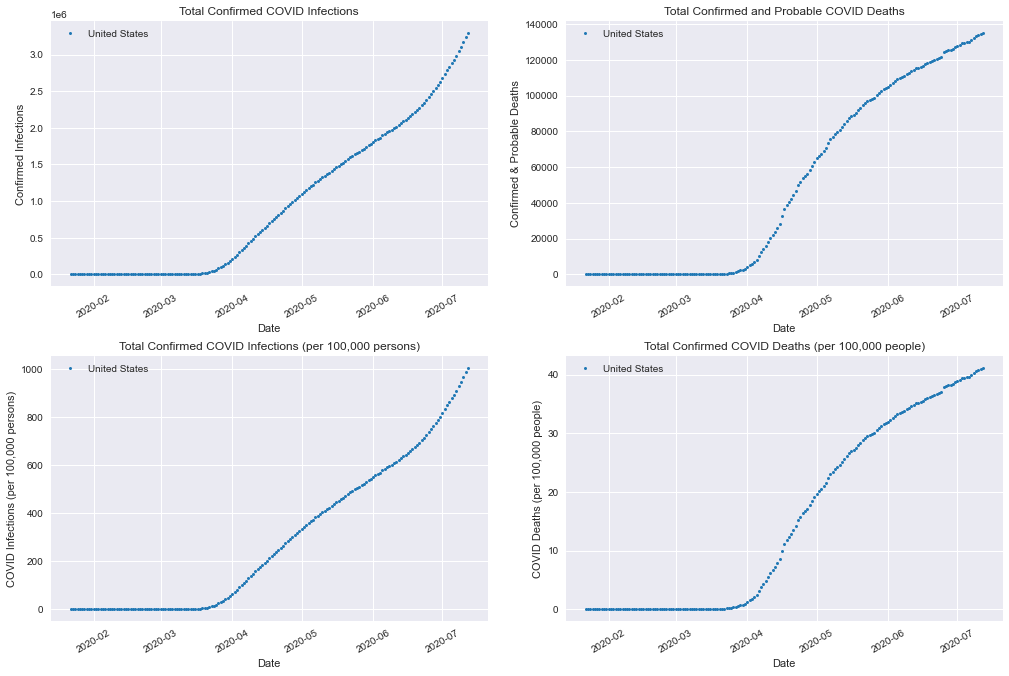

In [7]:
#
# Testing my function for plotting up time-series data (using states)
#
states = [FIPSd['United States']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(JH_state_df, 'Confirmed', states, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot(JH_state_df, 'ConfirmedRate', states, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot(JH_state_df, 'Deaths', states, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot(JH_state_df, 'DeathRate', states, fig=fig, ax=axs[1, 1]) # Lower Right

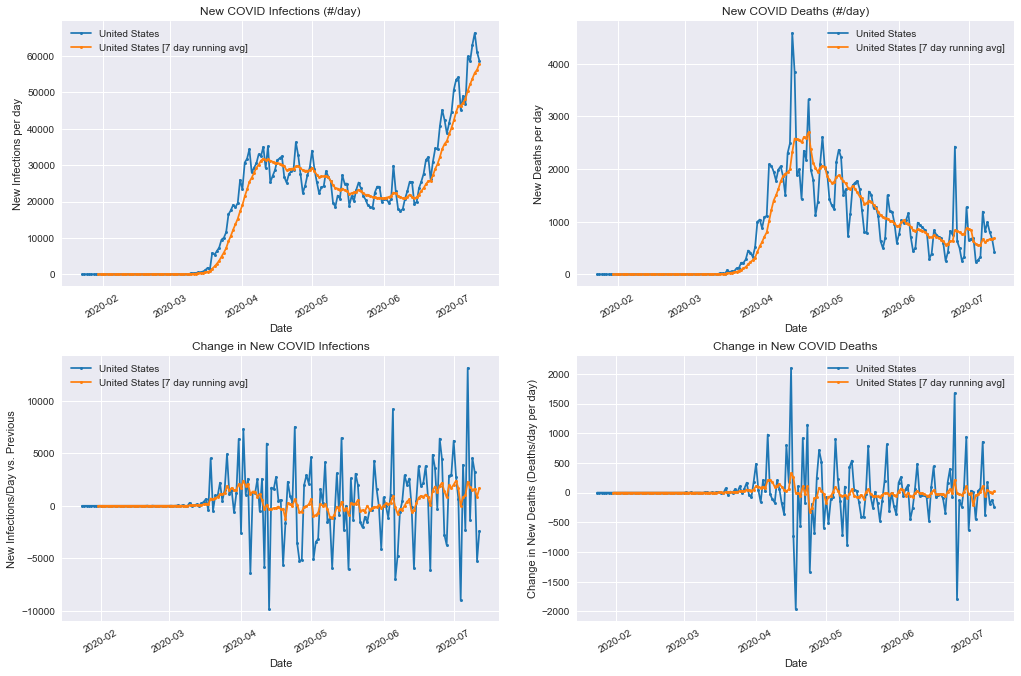

In [8]:
#
# Lets plot up the infection and death rates per day
#
states = [FIPSd['United States']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col] for single row
COVID_Dash.ts_plot(JH_state_df, 'dConfirmed', states, connectdots=True, fig=fig, ax=axs[0, 0])
COVID_Dash.ts_plot(JH_state_df, 'dConfirmed', states, connectdots=True, running_avg=7, fig=fig, ax=axs[0, 0])
COVID_Dash.ts_plot(JH_state_df, 'dDeaths', states, connectdots=True, fig=fig, ax=axs[0, 1])
COVID_Dash.ts_plot(JH_state_df, 'dDeaths', states, connectdots=True, running_avg=7, fig=fig, ax=axs[0, 1])
COVID_Dash.ts_plot(JH_state_df, 'd2Confirmed', states, connectdots=True, fig=fig, ax=axs[1, 0])
COVID_Dash.ts_plot(JH_state_df, 'd2Confirmed', states, connectdots=True, running_avg=7, fig=fig, ax=axs[1, 0])
COVID_Dash.ts_plot(JH_state_df, 'd2Deaths', states, connectdots=True, fig=fig, ax=axs[1, 1])
COVID_Dash.ts_plot(JH_state_df, 'd2Deaths', states, connectdots=True, running_avg=7, fig=fig, ax=axs[1, 1])

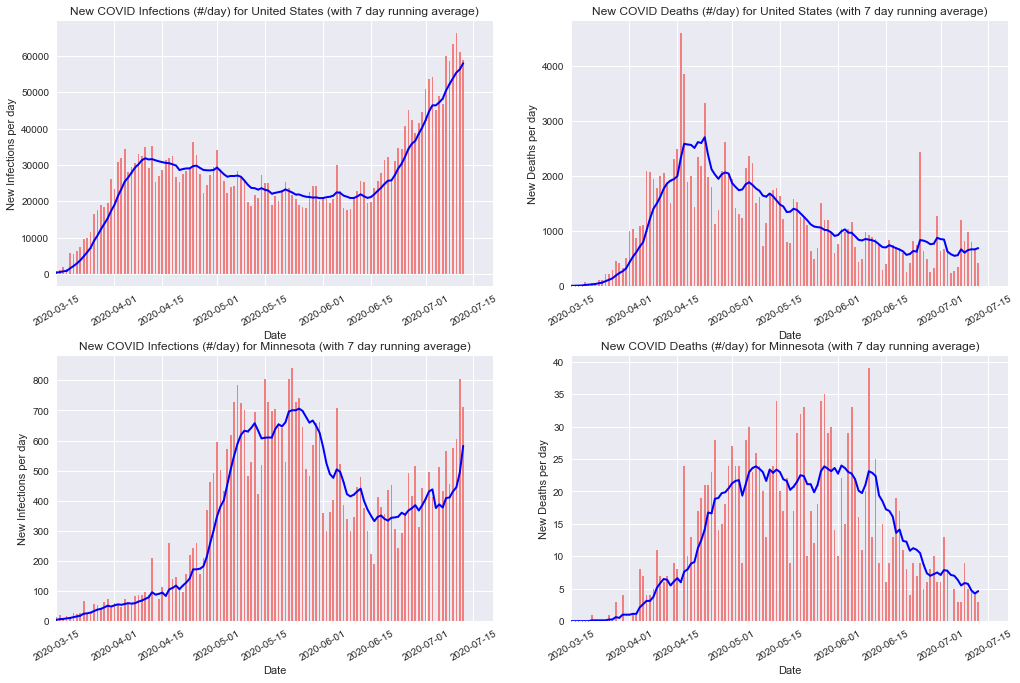

In [9]:
# Try to make a bar graph version of the infections and deaths as well

#
# Lets plot up the infection and death rates per day
#

# Set up a figure of 1 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col] for single row
# COVID_Dash.ts_barplot can only handle a SINGLE FIPS number, not a list
COVID_Dash.ts_barplot(JH_state_df, 'dConfirmed', FIPSd['United States'], running_avg=7, fig=fig, ax=axs[0, 0])
COVID_Dash.ts_barplot(JH_state_df, 'dDeaths', FIPSd['United States'], running_avg=7, fig=fig, ax=axs[0, 1])
COVID_Dash.ts_barplot(JH_state_df, 'dConfirmed', FIPSd['Minnesota'], running_avg=7, fig=fig, ax=axs[1, 0])
COVID_Dash.ts_barplot(JH_state_df, 'dDeaths', FIPSd['Minnesota'], running_avg=7, fig=fig, ax=axs[1, 1])

# Adjust the minimum date to be March 15 on all plots
adjust_bounds00 = axs[0, 0].set_xlim( [datetime.date(2020, 3, 15), axs[0, 0].get_xlim()[1]])
adjust_bounds01 = axs[0, 1].set_xlim( [datetime.date(2020, 3, 15), axs[0, 1].get_xlim()[1]])
adjust_bounds10 = axs[1, 0].set_xlim( [datetime.date(2020, 3, 15), axs[1, 0].get_xlim()[1]])
adjust_bounds11 = axs[1, 1].set_xlim( [datetime.date(2020, 3, 15), axs[1, 1].get_xlim()[1]])

## Infections and Deaths for Nearby States

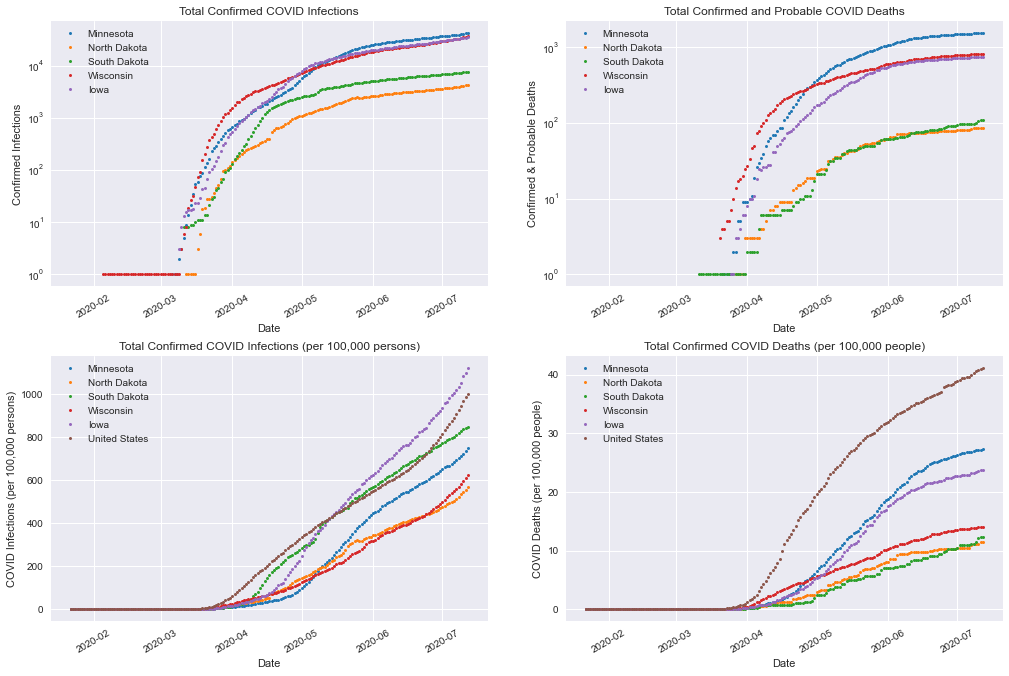

In [10]:
#
# Testing my function for plotting up time-series data (using states)
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
statesNus = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa'], FIPSd['United States']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(JH_state_df, 'Confirmed', states, ylog=True, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot(JH_state_df, 'ConfirmedRate', statesNus, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot(JH_state_df, 'Deaths', states, ylog=True, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot(JH_state_df, 'DeathRate', statesNus, fig=fig, ax=axs[1, 1]) # Lower Right

## Infections and Deaths for Some Selected Counties

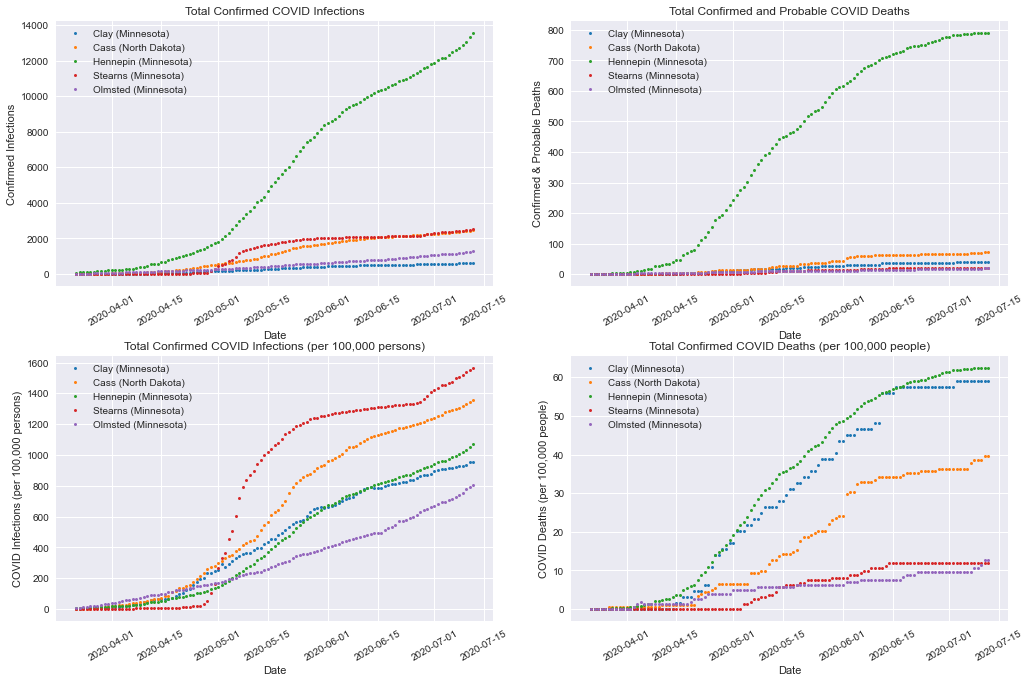

In [11]:
#
# Testing my function for plotting up time-series data (using counties)
#
counties = [ClayFIPS, CassFIPS, FIPSd['Hennepin (Minnesota)'], FIPSd['Stearns (Minnesota)'], FIPSd['Olmsted (Minnesota)']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(JH_cnty_df, 'Confirmed', counties, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot(JH_cnty_df, 'ConfirmedRate', counties, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot(JH_cnty_df, 'Deaths', counties, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot(JH_cnty_df, 'DeathRate', counties, fig=fig, ax=axs[1, 1]) # Lower Right
    

## Infections and Deaths for a Mixture of States and Counties

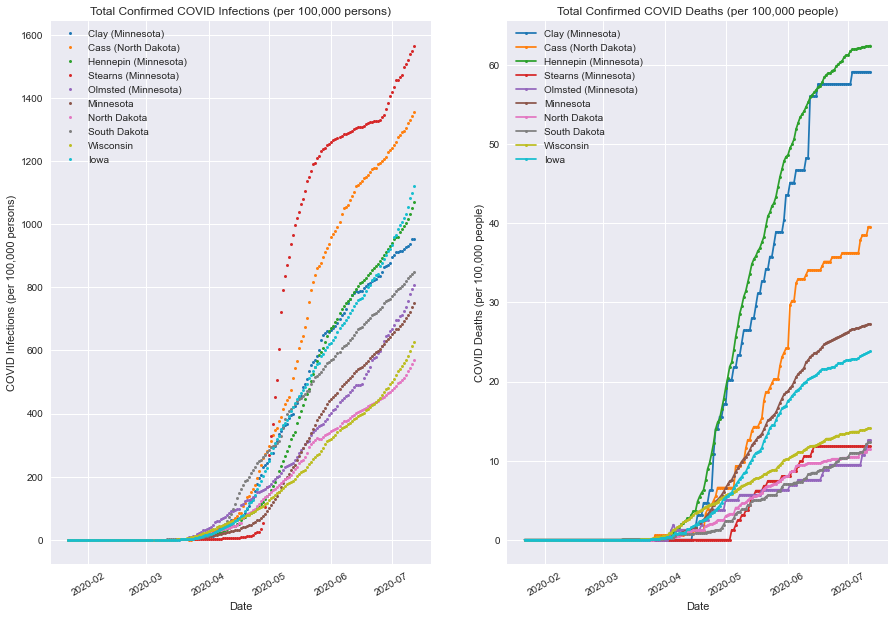

In [12]:
#
# Producing a plot of 2 plots next to each other, this makes the axis argument returned by subplots a 1-D list
# This example also shows how we can overlay state and county data when appropriate, just run the time-series function
# on the same axis element and it will update it instead of erasing it.
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
counties = [ClayFIPS, CassFIPS, FIPSd['Hennepin (Minnesota)'], FIPSd['Stearns (Minnesota)'], FIPSd['Olmsted (Minnesota)']]

# Set up a single figure
fig, axs = plt.subplots(1, 2, figsize=(15,10))

COVID_Dash.ts_plot(JH_cnty_df, 'ConfirmedRate', counties, fig=fig, ax=axs[0]) # Counties
COVID_Dash.ts_plot(JH_state_df, 'ConfirmedRate', states, fig=fig, ax=axs[0]) # States
COVID_Dash.ts_plot(JH_cnty_df, 'DeathRate', counties, connectdots=True, fig=fig, ax=axs[1]) # Counties
COVID_Dash.ts_plot(JH_state_df, 'DeathRate', states, connectdots=True, fig=fig, ax=axs[1]) # States

# You could execute a command like this to save the image to a file (it automatically determines file
# format based on the suffix).  
# plt.savefig("COVID_data.png")

## People Tested in Nearby States

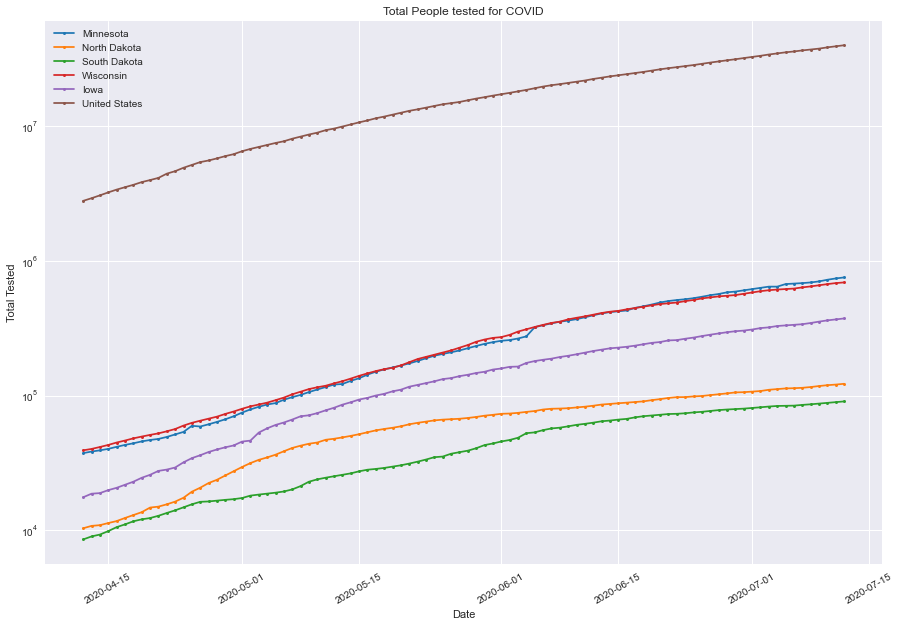

In [13]:
#
# Producing a single plot makes the axis argument returned by subplots a scalar, also using
# logarithmic axis by adjusting the plot after the fact
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa'], FIPSd['United States']]

# Set up a single figure
fig, axs = plt.subplots(1, 1, figsize=(15,10))

COVID_Dash.ts_plot(JH_state_df, 'People_Tested', states, connectdots=True, ylog=True,  fig=fig, ax=axs) # States

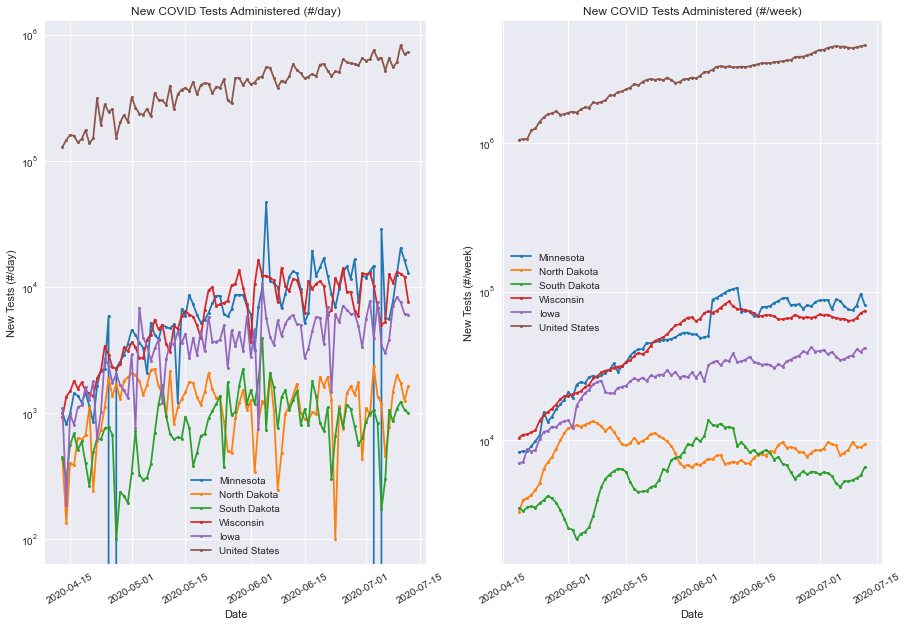

In [14]:
#
# Lets plot up the test rates per day
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa'], FIPSd['United States']]

# Set up 2 figures
fig, axs = plt.subplots(1, 2, figsize=(15,10))

# Axis numbers here can be viewed as [row, col] for single row
COVID_Dash.ts_plot(JH_state_df, 'dTested', states, connectdots=True, ylog=True, fig=fig, ax=axs[0]) # States
COVID_Dash.ts_plot(JH_state_df, 'dTestedWk', states, connectdots=True, ylog=True, fig=fig, ax=axs[1]) # States

## Infection and Death  Per Day

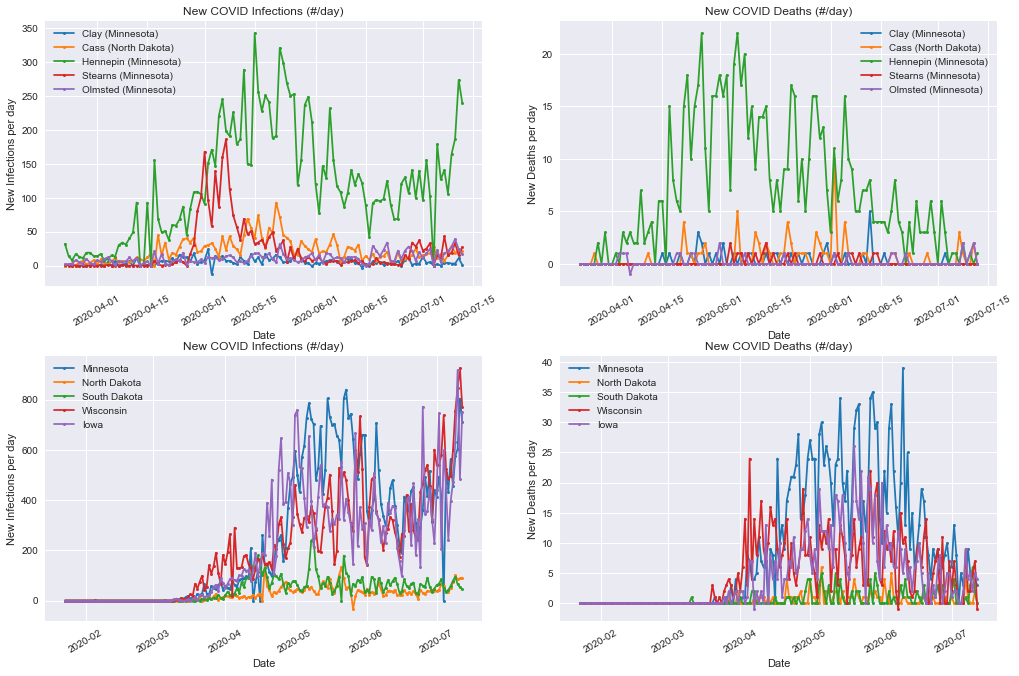

In [15]:
#
# Lets plot up the infection and death rates per day
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
counties = [ClayFIPS, CassFIPS, FIPSd['Hennepin (Minnesota)'], FIPSd['Stearns (Minnesota)'], FIPSd['Olmsted (Minnesota)']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(JH_cnty_df, 'dConfirmed', counties, connectdots=True, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot(JH_state_df, 'dConfirmed', states, connectdots=True, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot(JH_cnty_df, 'dDeaths', counties, connectdots=True, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot(JH_state_df, 'dDeaths', states, connectdots=True, fig=fig, ax=axs[1, 1]) # Lower Right

## Change in Rate of Infections and Deaths Per Day for Selected Counties

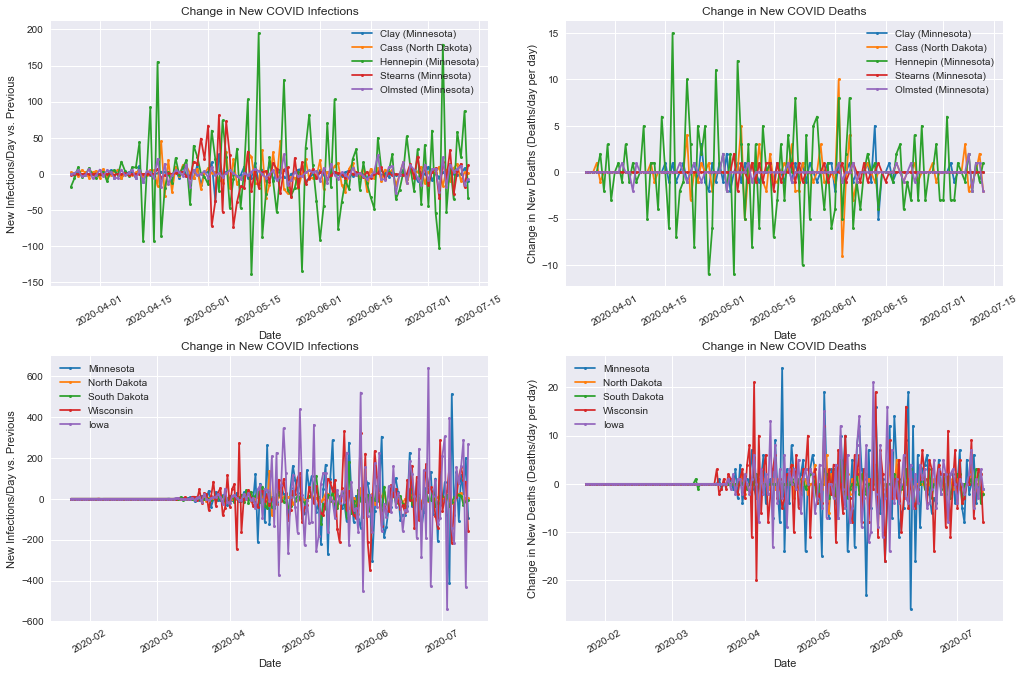

In [16]:
#
# Lets plot up the changes in those infection and death rates per day (This shows that this data likely needs to be smoothed
# to see trends).mobiiliuty
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
counties = [ClayFIPS, CassFIPS, FIPSd['Hennepin (Minnesota)'], FIPSd['Stearns (Minnesota)'], FIPSd['Olmsted (Minnesota)']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(JH_cnty_df, 'd2Confirmed', counties, connectdots=True, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot(JH_state_df, 'd2Confirmed', states, connectdots=True, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot(JH_cnty_df, 'd2Deaths', counties, connectdots=True, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot(JH_state_df, 'd2Deaths', states, connectdots=True, fig=fig, ax=axs[1, 1]) # Lower Right

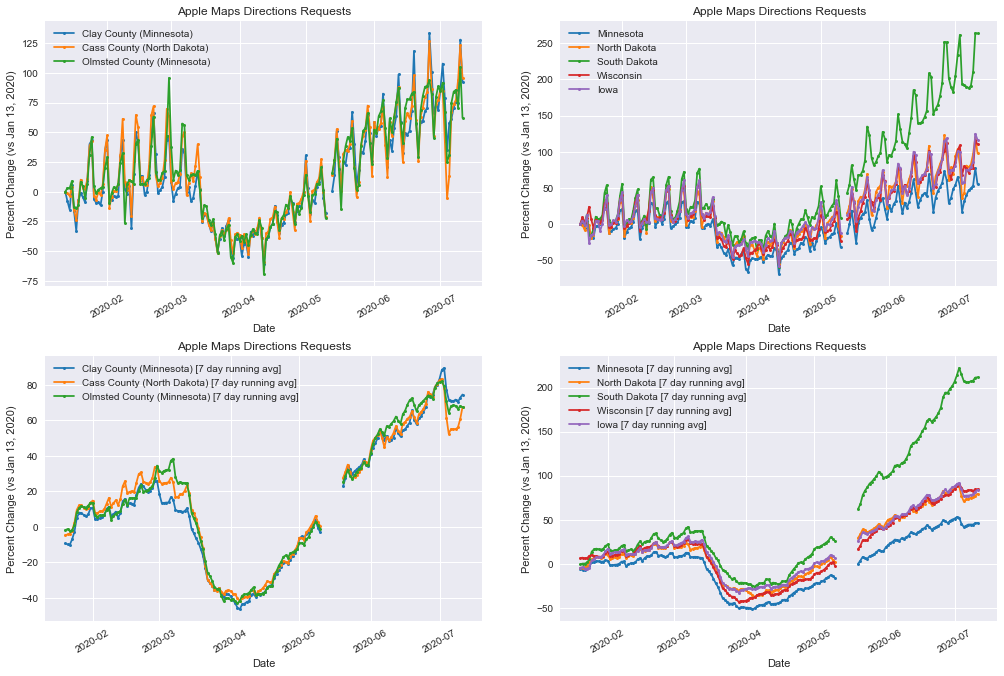

In [17]:
#
# Testing my function for plotting up time-series mobility data
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
counties = [ClayFIPS, CassFIPS, FIPSd['Olmsted (Minnesota)']]

# Set up a figure of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot(aapl_cnty_df, 'driving_mobility_Percent', counties, connectdots=True, fig=fig, ax=axs[0, 0])
COVID_Dash.ts_plot(aapl_state_df, 'driving_mobility_Percent', states, connectdots=True, fig=fig, ax=axs[0, 1]) 
COVID_Dash.ts_plot(aapl_cnty_df, 'driving_mobility_Percent', counties, running_avg=7, connectdots=True, fig=fig, ax=axs[1, 0])
COVID_Dash.ts_plot(aapl_state_df, 'driving_mobility_Percent', states, running_avg=7, connectdots=True, fig=fig, ax=axs[1, 1]) 

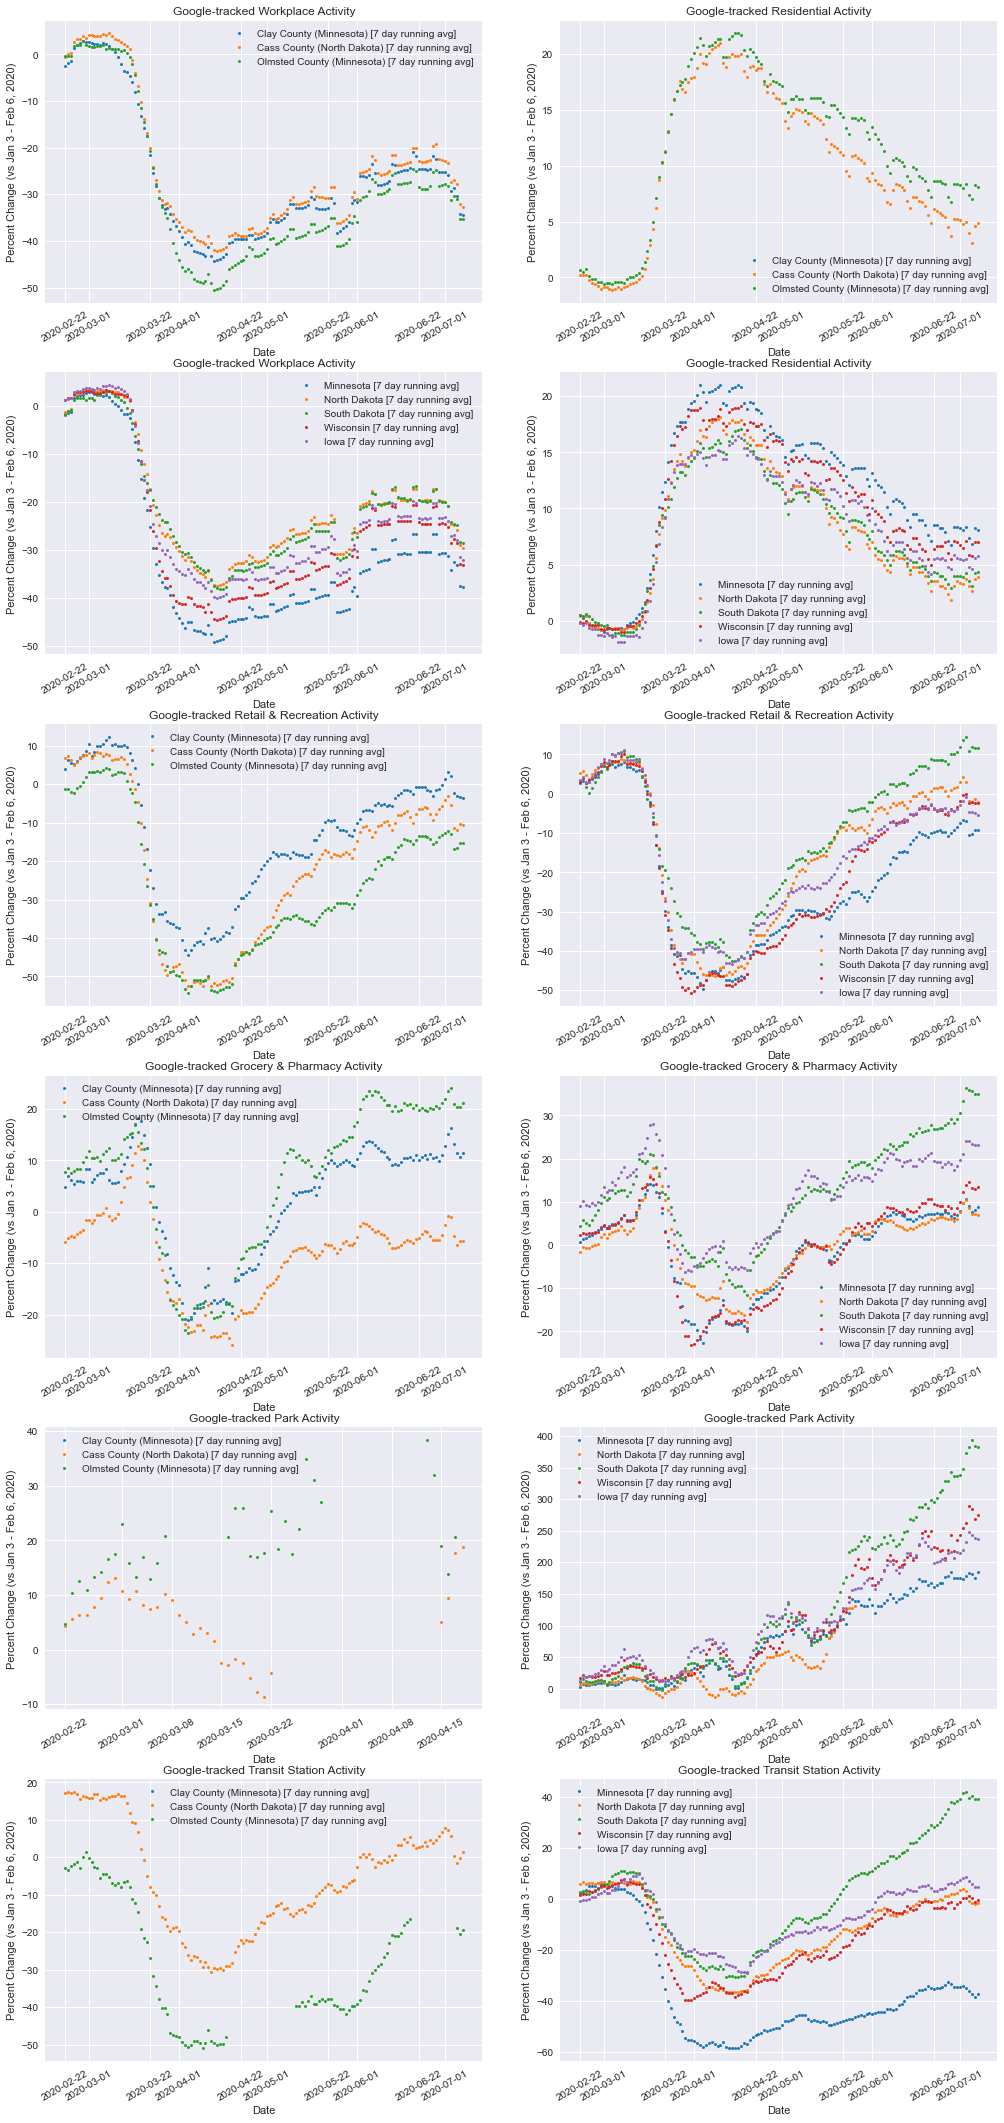

In [18]:
#
# Again, testing my function for plotting up time-series mobility data 
# (this time using running averages to smooth the data).
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]
counties = [ClayFIPS, CassFIPS, FIPSd['Olmsted (Minnesota)']]

# Set up a figure of 6 x 2 plots
fig, axs = plt.subplots(6, 2, figsize=(15,30))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col] 
COVID_Dash.ts_plot(goog_cnty_df, 'workplace_Percent', counties, running_avg=7, fig=fig, ax=axs[0,0])
COVID_Dash.ts_plot(goog_state_df, 'workplace_Percent', states, running_avg=7, fig=fig, ax=axs[1, 0]) 
COVID_Dash.ts_plot(goog_cnty_df, 'residential_Percent', counties, running_avg=7, fig=fig, ax=axs[0, 1])
COVID_Dash.ts_plot(goog_state_df, 'residential_Percent', states, running_avg=7, fig=fig, ax=axs[1, 1]) 
COVID_Dash.ts_plot(goog_cnty_df, 'retail_recreation_Percent', counties, running_avg=7, fig=fig, ax=axs[2, 0])
COVID_Dash.ts_plot(goog_state_df, 'retail_recreation_Percent', states, running_avg=7, fig=fig, ax=axs[2, 1]) 
COVID_Dash.ts_plot(goog_cnty_df, 'grocery_pharm_Percent', counties, running_avg=7, fig=fig, ax=axs[3, 0])
COVID_Dash.ts_plot(goog_state_df, 'grocery_pharm_Percent', states, running_avg=7, fig=fig, ax=axs[3, 1]) 
COVID_Dash.ts_plot(goog_cnty_df, 'parks_Percent', counties, running_avg=7, fig=fig, ax=axs[4, 0])
COVID_Dash.ts_plot(goog_state_df, 'parks_Percent', states, running_avg=7, fig=fig, ax=axs[4, 1]) 
COVID_Dash.ts_plot(goog_cnty_df, 'transit_stations_Percent', counties, running_avg=7, fig=fig, ax=axs[5, 0])
COVID_Dash.ts_plot(goog_state_df, 'transit_stations_Percent', states, running_avg=7, fig=fig, ax=axs[5, 1]) 

## Hospitaliziation Data Current Values & Predictions

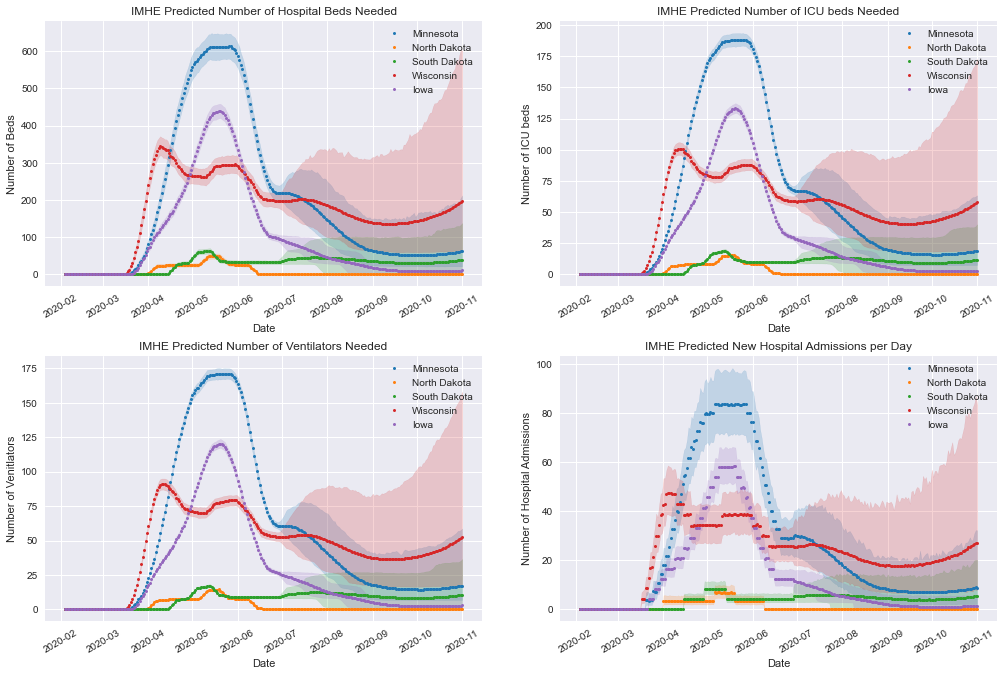

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

# Axis numbers here can be viewed as [row, col]
COVID_Dash.ts_plot_Hos(hospitalization_df, 'allbed_mean', states, fig=fig, ax=axs[0, 0]) # Upper Left
COVID_Dash.ts_plot_Hos(hospitalization_df, 'InvVen_mean', states, fig=fig, ax=axs[1, 0]) # Lower Left
COVID_Dash.ts_plot_Hos(hospitalization_df, 'ICUbed_mean', states, fig=fig, ax=axs[0, 1]) # Upper Right
COVID_Dash.ts_plot_Hos(hospitalization_df, 'admis_mean', states, fig=fig, ax=axs[1, 1]) # Lower Right

## Implementing Maps using iPyLeaflet 

***WARNING and hint for developers***: Because of the way updating overlays works in ipyleaflet, if you generate two different state maps using `update_us_statesmap()` or two different county maps using `build_us_cntymap()` in the same notebook, the overlays (which we use to display tooltips of current parameter values as you hover over locations) will interfere with one another. If you examine the source code, you are welcome to write a custom plotting and overlay updating functions by copying our functions and changing the overlay variable name, making sure it is global and unique for each separate map you want to display, so the updating functions don't collide

In [20]:
# Pick the data column to plot
colname = 'dConfirmedRate'

# Plot the US Map with State-level data
test_map, test_legend, test_overlay = COVID_Maps.build_us_statesmap(JH_state_df, colname)

display(test_map)

Map(center=[38.0, -93.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [21]:
# This command can be used to update an existing state-level map but we need to pass it the map, legend, and overlay 
# (tooltip) objects to update
COVID_Maps.update_us_statesmap(JH_state_df, 'dDeathsRate', test_map, test_legend, test_overlay)

In [22]:
# Pick the data column to plot
colname = 'dConfirmedRate'

# Plot the US Map with State-level data
test_map2, test_legend2, test_overlay2 = COVID_Maps.build_us_cntymap(JH_cnty_df, colname)

display(test_map2)

Map(center=[38.0, -93.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
# To make updates work properly, we have to pass the map, legend, and overlay objects we want to modify
COVID_Maps.update_us_cntymap(JH_cnty_df, 'dDeathsRate', test_map2, test_legend2, test_overlay2)

In [ ]:
# We can even replace a existing county map with a state-level map, we just update using the state
# update routine pointed at the county-level map. (uncomment the last line in this cell to try.  However, right now, 
# you can't have two state-level maps in the same notebook without the overlayed tooltips interfering.)
# COVID_Maps.update_us_statesmap(JH_state_df, 'dDeathsRate', test_map2, test_legend2, test_overlay2)

# Plot $R_t$ (Effective Reproduction Rate) as a function of time

$R_t$ is an estimate of the number of new people each infected person infects.

In [ ]:
#
# Testing my function for plotting up time-series R_t data
#
states = [MNFIPS, NDFIPS, FIPSd['South Dakota'], FIPSd['Wisconsin'], FIPSd['Iowa']]

# Set up a single plot
COVID_Dash.ts_plot_Rt(RtLive_df, states, connectdots=True)